In [43]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from glob import glob
import pandas as pd
import pickle
import random
from PIL import Image
from glob import glob
import re
#from adjustText import adjust_text
import seaborn as sns
#import statannot
from statannotations.Annotator import Annotator
import argparse
#import torch
import wandb
import sys
from functools import reduce
import torch
import math
import io
import colorcet as cc
from adjustText import adjust_text
sys.path.append('../../modified_medsam_repo')
from MedSAM_HCP.dataset import MRIDataset_Imgs, load_datasets, LabelConverter
#sys.path.append('./modified_medsam_repo')

In [23]:
sns.set_style("whitegrid")
palette = sns.color_palette("Dark2")

In [9]:
def get_df_from_path(path, elements_dict):
    assemble = {'dice_sensitivity': [], 'dice_specificity': [], 'overall_dice': []}
    for x in elements_dict.keys():
        assemble[x] = []

        # assert that this is an index that can be used in the path
        assert isinstance(elements_dict[x], int)
    
    for p in path:
        for x in elements_dict.keys():
            idx = elements_dict[x]
            this_val = p.split('/')[idx]
            assemble[x].append(this_val)

        dicto = pd.read_pickle(p)
        assemble['dice_sensitivity'].append(dicto['dice_sensitivity'].item())
        assemble['dice_specificity'].append(dicto['dice_specificity'].item())
        assemble['overall_dice'].append(dicto['overall_dice'].item())

    df = pd.DataFrame(assemble)
    return df

# Main Analysis: LR

In [30]:
medsam_main_lr_paths = glob('/gpfs/data/luilab/karthik/pediatric_seg_proj/results_copied_from_kn2347/hyperparam_tuning/main_analysis_LR_1-16-25/MedSAM/val/*/*/eval_singletask_unprompted_val_label*.pkl')
unet_main_lr_paths = glob('/gpfs/data/luilab/karthik/pediatric_seg_proj/results_copied_from_kn2347/unet_retune_lr_9-8-24/val/*/*/*.pkl')
element_dict = {'lr': -2, 'label': -3}

main_medsam_lr_df = get_df_from_path(medsam_main_lr_paths, element_dict)
main_medsam_lr_df = main_medsam_lr_df.astype({'lr': float, 'label': int})

main_unet_lr_df = get_df_from_path(unet_main_lr_paths, element_dict)
main_unet_lr_df = main_unet_lr_df.astype({'lr': float, 'label': int})

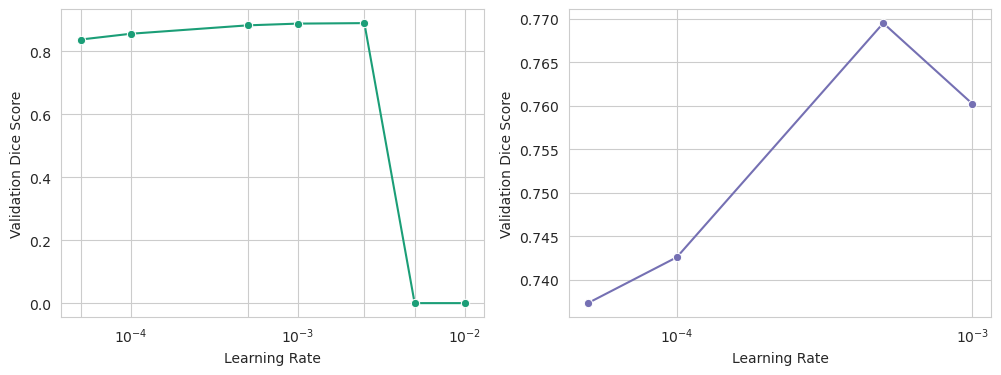

In [70]:
# plot
fig, axs = plt.subplots(1, 2, figsize = (12, 4), squeeze=False)

sns.lineplot(main_medsam_lr_df, x = 'lr', y = 'dice_sensitivity', errorbar = None, marker='o', ax = axs[0,0], color = palette[0])

axs[0,0].set_xscale('log')
axs[0,0].set_xticks([5e-5, 1e-4, 5e-4, 1e-3, 2.5e-3, 5e-3, 1e-2])
axs[0,0].set_xlabel('Learning Rate')
axs[0,0].set_ylabel('Validation Dice Score')

sns.lineplot(main_unet_lr_df, x = 'lr', y = 'dice_sensitivity', errorbar = None, marker='o', ax = axs[0,1], color = palette[2])
axs[0,1].set_xticks([5e-5, 1e-4, 5e-4, 1e-3, 2.5e-3, 5e-3, 1e-2])
axs[0,1].set_xscale('log')
axs[0,1].set_xlabel('Learning Rate')
axs[0,1].set_ylabel('Validation Dice Score')

fig.savefig('/gpfs/home/kn2347/figs/main_analysis_LR_expt.pdf', dpi=300)

# Main Analysis: Batch size

In [58]:
medsam_main_bs_paths = glob('/gpfs/data/luilab/karthik/pediatric_seg_proj/results_copied_from_kn2347/hyperparam_tuning/main_analysis_batch_size_1-17-25/MedSAM/val/*/*/eval_singletask_unprompted_val_label*.pkl')
unet_main_bs_paths = glob('/gpfs/data/luilab/karthik/pediatric_seg_proj/results_copied_from_kn2347/unet_retrain_dice_batchsz_expt_11-11-24/val/0.0005/1/100/*/eval_singletask_unet_val_label*.pkl')
element_dict = {'batch_size': -2, 'label': -3}

main_medsam_bs_df = get_df_from_path(medsam_main_bs_paths, element_dict)
main_medsam_bs_df = main_medsam_bs_df.astype({'batch_size': int, 'label': int})

element_dict = {'batch_size': -2, 'label': -4}
main_unet_bs_df = get_df_from_path(unet_main_bs_paths, element_dict)
main_unet_bs_df = main_unet_bs_df.astype({'batch_size': int, 'label': int})

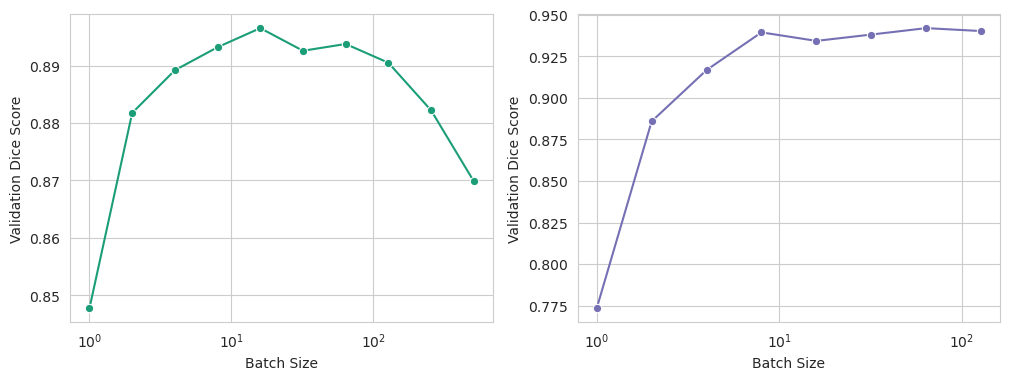

In [62]:
# plot
fig, axs = plt.subplots(1, 2, figsize = (12, 4), squeeze=False)

sns.lineplot(main_medsam_bs_df, x = 'batch_size', y = 'dice_sensitivity', errorbar = None, marker='o', ax = axs[0,0], color = palette[0])

axs[0,0].set_xscale('log')
#axs[0,0].set_xticks([1, 2, 4, 8, 16, 32, 64, 128, 256])
axs[0,0].set_xlabel('Batch Size')
axs[0,0].set_ylabel('Validation Dice Score')

sns.lineplot(main_unet_bs_df, x = 'batch_size', y = 'dice_sensitivity', errorbar = None, marker='o', ax = axs[0,1], color = palette[2])
axs[0,1].set_xscale('log')
#axs[0,0].set_xticks([1, 2, 4, 8, 16, 32, 64, 128, 256])
axs[0,1].set_xlabel('Batch Size')
axs[0,1].set_ylabel('Validation Dice Score')

fig.savefig('/gpfs/home/kn2347/figs/main_analysis_batchsize_expt.pdf', dpi=300)

# Subset Analysis

In [ ]:
medsam_paths = glob('/gpfs/data/luilab/karthik/pediatric_seg_proj/results_copied_from_kn2347/hyperparam_tuning/subset_analysis_batch_size_1-22-25/MedSAM/val/*/*/*/eval_singletask_unprompted_val_label*.pkl')

In [ ]:
element_dict = {'batch_size': -2, 'frac': -3, 'label': -4}
get_df_from_path(medsam_, elements_dict)

In [88]:
paths_medsam_batchsize = glob('/gpfs/data/luilab/karthik/pediatric_seg_proj/results_copied_from_kn2347/hyperparam_tuning/subset_analysis_batch_size_1-22-25/MedSAM/val/*/*/*/eval_singletask_unprompted_val_label*.pkl')
paths_unet = glob('/gpfs/data/luilab/karthik/pediatric_seg_proj/results_copied_from_kn2347/unet_retrain_dice_batchsz_expt_11-11-24/val/0.0005/*/*/*/eval_singletask_unet_val_label*.pkl')

def do_work(paths, label_idx=-5, col = None):
    assemble = {'batch_size': [], 'frac': [], 'label': [], 'dice_sensitivity': [], 'dice_specificity': [], 'overall_dice': []}
    for p in paths:
        batch_size = int(p.split('/')[-2])
        frac = float(p.split('/')[-3])
        label = int(p.split('/')[label_idx])

        assemble['batch_size'].append(batch_size)
        assemble['frac'].append(frac)
        assemble['label'].append(label)

        dicto = pd.read_pickle(p)
        assemble['dice_sensitivity'].append(dicto['dice_sensitivity'].item())
        assemble['dice_specificity'].append(dicto['dice_specificity'].item())
        assemble['overall_dice'].append(dicto['overall_dice'].item())


    df = pd.DataFrame(assemble)


    fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, constrained_layout=True)
    for i, frac in enumerate([0.1, 100]):
        for j, label in enumerate([1,7, 71]):

            sub1 = df[(df['label'] == label) & (df['frac'] == frac)].reset_index(drop=True)
            melted = pd.melt(sub1, id_vars = ['label', 'frac', 'batch_size'], value_vars = ['dice_sensitivity', 'dice_specificity', 'overall_dice'])
            melted = melted[melted['variable'] == 'dice_sensitivity']
            sns.lineplot(melted, x = 'batch_size', y = 'value', errorbar = None, marker='o', ax = axs[i,j], color = col)
            plt.xscale('log')
            axs[i,j].set_ylabel('Validation Dice Score')
            axs[i,j].title.set_text(f'Label {label}, N = {int(round(.01 * frac * 891))}')


            handles, labels = axs[i,j].get_legend_handles_labels()        
    #fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(1.3,.75))
    return fig, axs
    #plt.figlegend(loc='lower right',bbox_to_anchor=(0.85,0.25))
    
   

AttributeError: 'NoneType' object has no attribute 'remove'

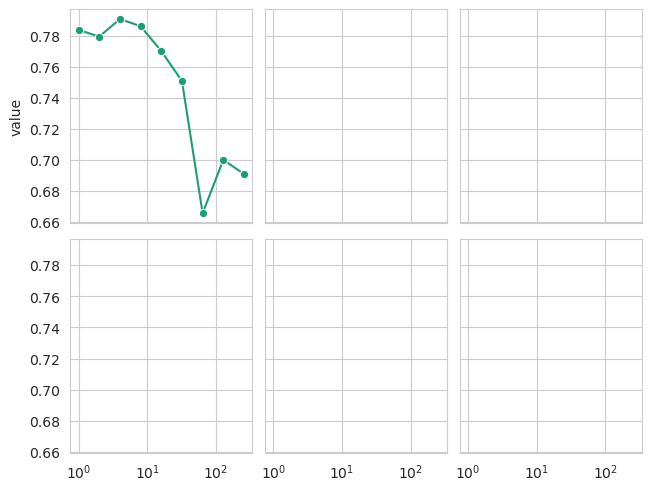

In [89]:
fig, axs = do_work(paths_medsam_batchsize, label_idx = -4, col = palette[0])
#fig.tight_layout()
fig.savefig('/gpfs/home/kn2347/figs/subset_analysis_batchsize_medsam.pdf', dpi=300, bbox_inches='tight')

fig, axs = do_work(paths_unet, label_idx = -4, col = palette[2])
#fig.tight_layout()
fig.savefig('/gpfs/home/kn2347/figs/subset_analysis_batchsize_unet.pdf', dpi=300, bbox_inches='tight')